# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

previsao_renda_raw = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')
previsao_renda_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [2]:
previsao_renda = previsao_renda_raw[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].copy()
previsao_renda['qtd_filhos_pct'] = previsao_renda['qtd_filhos'] / (previsao_renda_raw['qtd_filhos'].sum() - previsao_renda['qtd_filhos'])
previsao_renda['idade_pct'] = previsao_renda['idade'] / (previsao_renda_raw['idade'].sum() - previsao_renda['idade'])
previsao_renda['tempo_emprego_pct'] = previsao_renda['tempo_emprego'] / (previsao_renda_raw['tempo_emprego'].sum() - previsao_renda['tempo_emprego'])
previsao_renda['qt_pessoas_residencia_pct'] = previsao_renda['qt_pessoas_residencia'] / (previsao_renda_raw['qt_pessoas_residencia'].sum() - previsao_renda['qt_pessoas_residencia'])
previsao_renda['renda_pct'] = previsao_renda['renda'] / (previsao_renda_raw['renda'].sum() - previsao_renda['renda'])

In [3]:
n_meses = len(previsao_renda_raw['data_ref'].value_counts())
date_range = previsao_renda_raw['data_ref'].values[0]
n_clientes = 210

datas = pd.Series(pd.date_range(date_range, periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = previsao_renda.sample(n = n_meses * n_clientes, replace=True).reset_index()

previsao_renda2 = pd.concat([datas, dados], axis = 1)
previsao_renda2.rename({0:'data_ref'}, inplace = True, axis = 'columns')
previsao_renda2

,data_ref,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,qtd_filhos_pct,idade_pct,tempo_emprego_pct,qt_pessoas_residencia_pct,renda_pct
0,2015-01-01,12490,True,True,0,31,5.512329,2.0,1095.04,0.000000,0.000047,0.000057,0.00006,0.000016
1,2015-01-01,8786,False,True,1,39,12.523288,3.0,1558.17,0.000152,0.000059,0.000130,0.00009,0.000022
2,2015-01-01,1438,False,True,0,40,5.046575,2.0,1655.61,0.000000,0.000061,0.000052,0.00006,0.000024
3,2015-01-01,10495,False,True,0,48,10.438356,1.0,1600.03,0.000000,0.000073,0.000108,0.00003,0.000023
4,2015-01-01,14607,False,True,1,40,1.375342,3.0,5368.42,0.000152,0.000061,0.000014,0.00009,0.000077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,2016-03-01,6615,True,True,2,35,13.186301,4.0,4858.61,0.000305,0.000053,0.000136,0.00012,0.000070
3146,2016-03-01,4185,True,True,0,58,NaN,2.0,3003.97,0.000000,0.000088,NaN,0.00006,0.000043
3147,2016-03-01,5860,False,True,0,58,NaN,1.0,1748.01,0.000000,0.000088,NaN,0.00003,0.000025
3148,2016-03-01,1359,True,True,2,31,0.276712,4.0,4369.35,0.000305,0.000047,0.000003,0.00012,0.000063


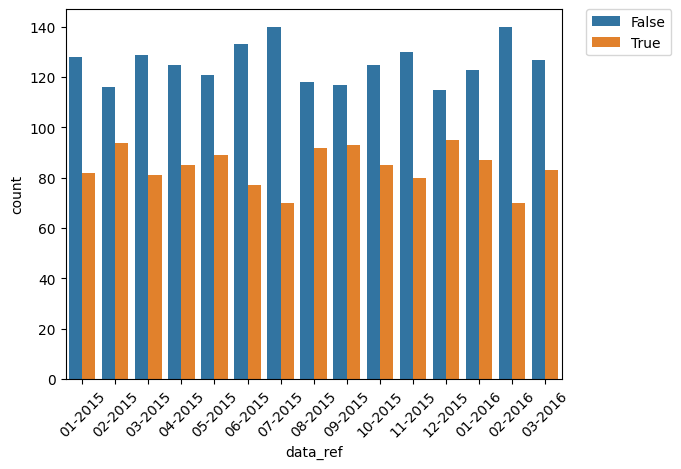

In [4]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=previsao_renda2)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

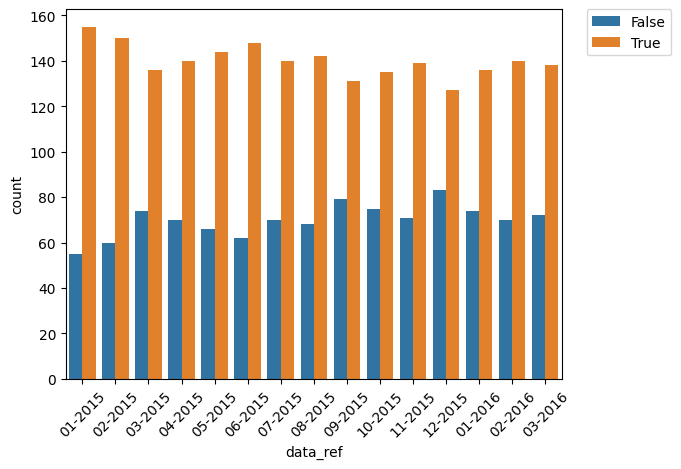

In [5]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=previsao_renda2)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Houve uma alteração interessante. Na comparação das variáveis qualitativas como preditoras de renda, possuir veículo apresentou-se bem significativo, olhando a amostragem de dados à luz da distribuição no tempo, a posse de imóvel tornou-se mais significativa.

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

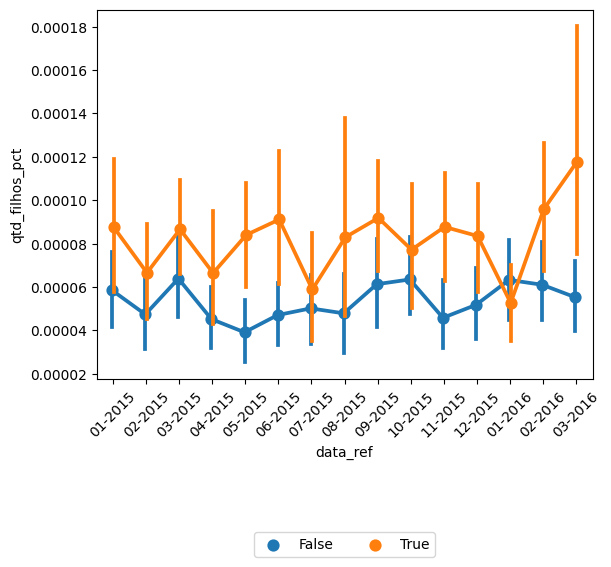

In [6]:
ax = sns.pointplot(x="data_ref", y="qtd_filhos_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

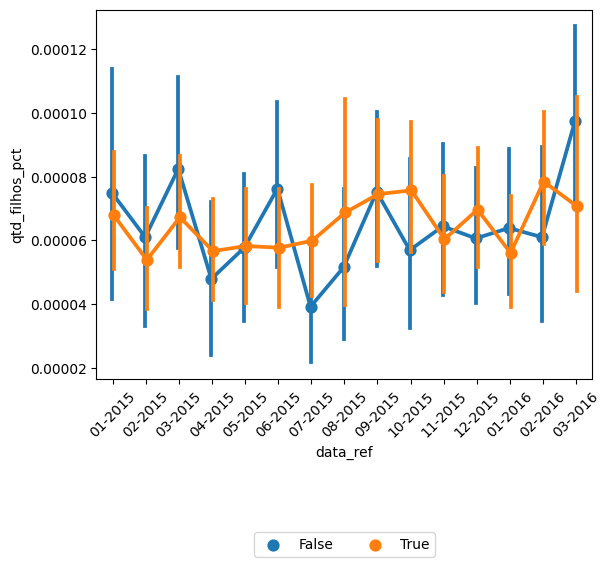

In [7]:
ax = sns.pointplot(x="data_ref", y="qtd_filhos_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

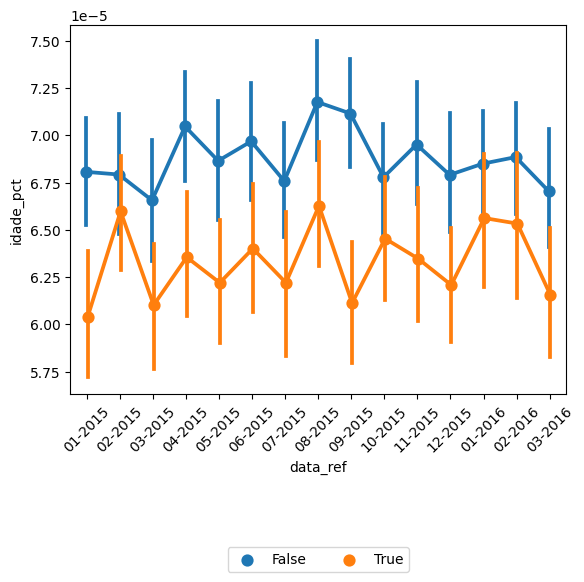

In [8]:
ax = sns.pointplot(x="data_ref", y="idade_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

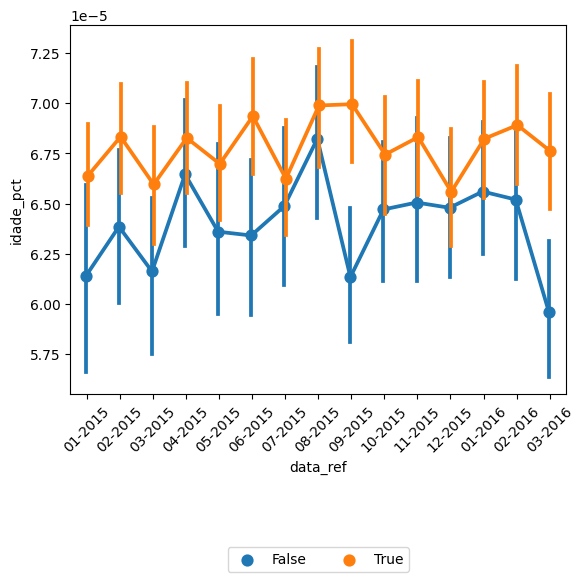

In [9]:
ax = sns.pointplot(x="data_ref", y="idade_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

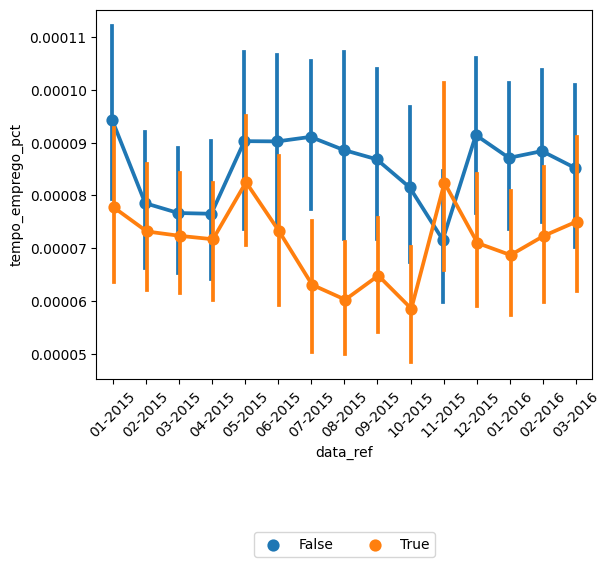

In [10]:
ax = sns.pointplot(x="data_ref", y="tempo_emprego_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

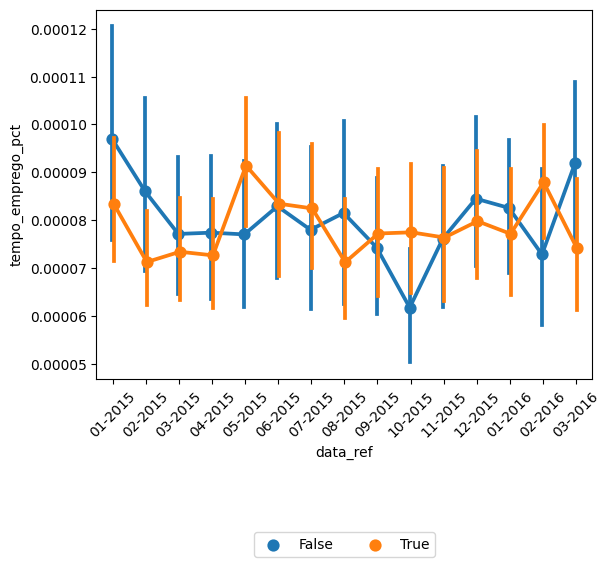

In [11]:
ax = sns.pointplot(x="data_ref", y="tempo_emprego_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

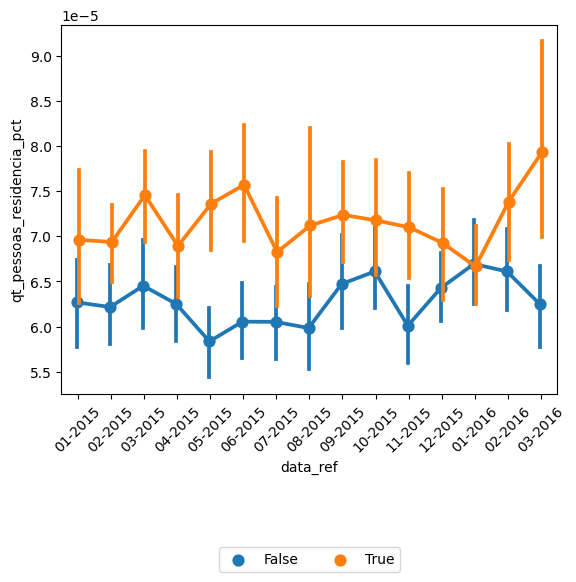

In [12]:
ax = sns.pointplot(x="data_ref", y="qt_pessoas_residencia_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

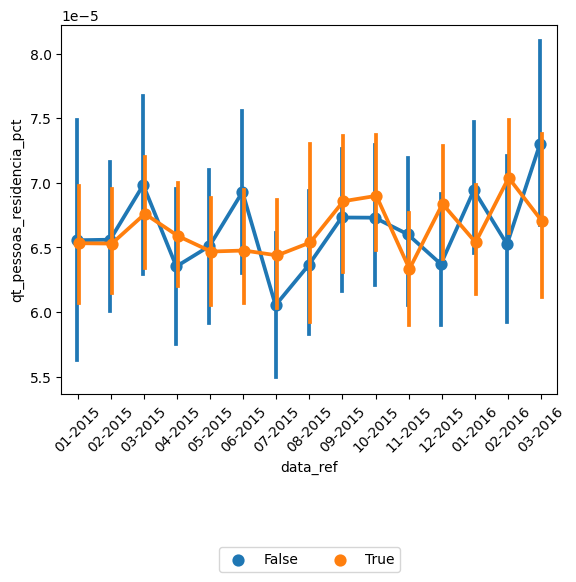

In [13]:
ax = sns.pointplot(x="data_ref", y="qt_pessoas_residencia_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

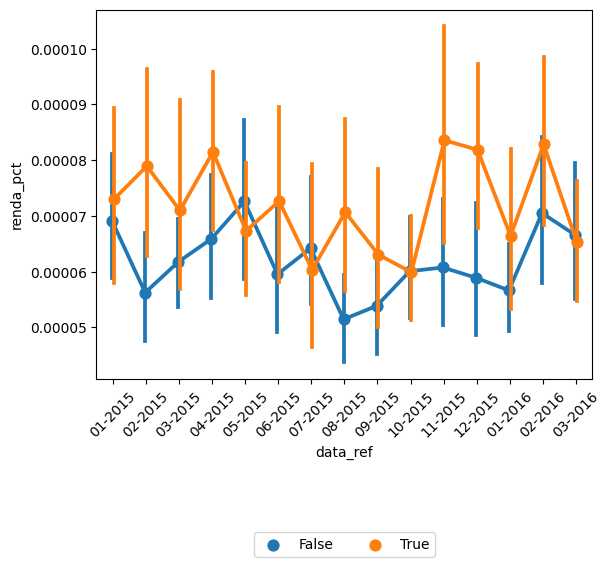

In [14]:
ax = sns.pointplot(x="data_ref", y="renda_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

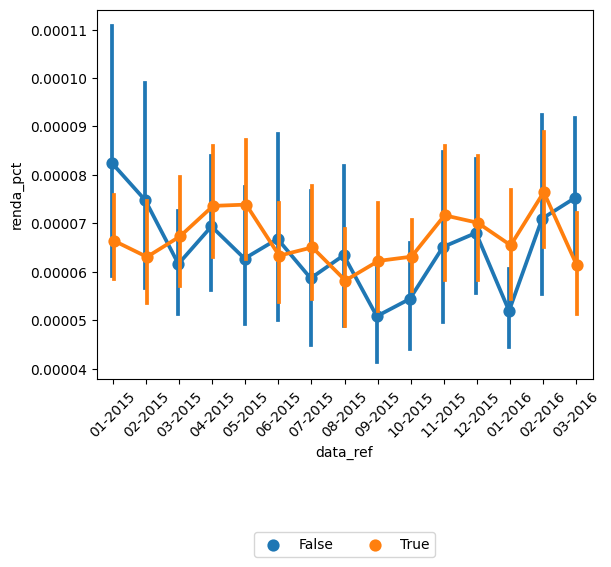

In [15]:
ax = sns.pointplot(x="data_ref", y="renda_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

Existe uma oscilação preocupante nas variavéis quantitativas que pode comprometer a integridade da modelagem.